# 机器学习练习 - 回归

代码更新地址：https://github.com/fengdu78/WZU-machine-learning-course

代码修改并注释：黄海广，haiguang2000@wzu.edu.cn

备注：最后更新 2023-07-23，去掉了np.matrix这个方法（新版本numpy不支持此方法）

## 单变量线性回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [3]:
path = 'data/regress_data1.csv'
data = pd.read_csv(path)
data.head()

,人口,收益
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,人口,收益
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


看下数据长什么样子

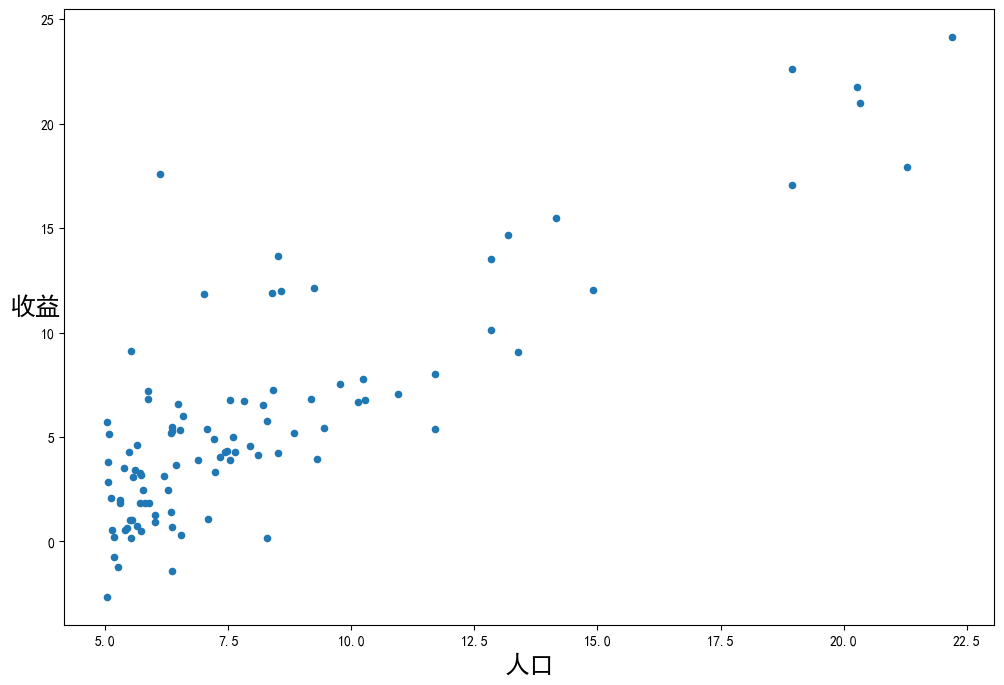

In [5]:
# 绘制散点图
data.plot(kind='scatter', x='人口', y='收益', figsize=(12,8))
# 设置x轴标签
plt.xlabel('人口', fontsize=18)
# 设置y轴标签，并将标签旋转为水平方向
plt.ylabel('收益', rotation=0, fontsize=18)
# 显示图形
plt.show()

现在让我们使用梯度下降来实现线性回归，以最小化代价函数。 

首先，我们将创建一个以参数$w$为特征函数的代价函数
$$J\left( w  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}}\left( x \right)={{w}^{T}}X={{w }_{0}}{{x}_{0}}+{{w }_{1}}{{x}_{1}}+{{w }_{2}}{{x}_{2}}+...+{{w }_{n}}{{x}_{n}}\\] 

In [6]:
def computeCost(X, y, w):
    """
    计算线性回归模型的代价函数。    
    参数：
    X -- 特征矩阵，形状为 (n_samples, n_features)
    y -- 标签向量，形状为 (n_samples,1)
    w -- 权重向量，形状为 (n_features,1)
    
    返回值：
    代价函数的值
    """
    inner = np.power(X @ w - y, 2)  # 计算预测值与实际值之差的平方和
    return np.sum(inner) / (2 * len(X))  # 对平方和进行求和并除以样本数量的两倍，得到代价函数的值

让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

In [7]:
#将一列名为'Ones'的值全为1的列插入到data的第一列位置。
data.insert(0, 'Ones', 1)
data

,Ones,人口,收益
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


现在我们来做一些变量初始化。

In [8]:
cols = data.shape[1]  # 获取data的列数
X = data.iloc[:,:cols-1]  # 获取除最后一列外的所有列作为特征矩阵X
y = data.iloc[:,cols-1:]  # 获取最后一列作为目标变量y

观察下 X (训练集) and y (目标变量)是否正确.

In [9]:
X.head()#head()是观察前5行

,Ones,人口
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [10]:
y.head()

,收益
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


代价函数是应该是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 我们还需要初始化w。

In [11]:
X = X.values
y = y.values
w = np.zeros((X.shape[1], 1))

w 现在是一个形状为 (2, 1) 的二维数组。

In [12]:
w

array([[0.],
       [0.]])

看下维度

In [13]:
X.shape, w.shape, y.shape

((97, 2), (2, 1), (97, 1))

计算代价函数 (theta初始值为0).

In [14]:
computeCost(X, y, w)

32.072733877455676

# Batch Gradient Decent（批量梯度下降）

$${{w }_{j}}:={{w }_{j}}- \alpha \frac{1}{m}\sum\limits_{i=1}^m \frac{\partial }{\partial {{w}_{j}}}J\left( w \right)$$

In [15]:
def batch_gradientDescent(X, y, w, alpha, count):
    """
    批量梯度下降算法实现。
    
    参数：
    X -- 特征矩阵，形状为 (n_samples, n_features)
    y -- 标签向量，形状为 (n_samples,1)
    w -- 权重向量，形状为 (n_features,1)
    alpha -- 学习率
    count -- 迭代次数
    
    返回值：
    w -- 更新后的权重向量
    costs -- 每次迭代的代价函数值列表
    """
    # 初始化代价函数值列表
    costs = []

    # 对每个样本进行迭代
    for i in range(count):
        # 根据公式更新权重向量
        w = w - (X.T @ (X @ w - y)) * alpha / len(X)

        # 计算当前代价函数值并添加到列表中
        cost = computeCost(X, y, w)
        costs.append(cost)

        # 每隔100次迭代输出一次当前代价函数值
        if i % 100 == 0:
            print("在第{}次迭代中，cost的值是：{}。".format(i, cost))

    # 返回最终的权重向量和代价函数值列表
    return w, costs

初始化一些附加变量 - 学习速率α和要执行的迭代次数。

In [16]:
alpha = 0.01
iters = 2000

现在让我们运行梯度下降算法来将我们的参数θ适合于训练集。

In [17]:
w, cost = batch_gradientDescent(X, y, w, alpha, iters)#返回更新后的参数向量g和损失值数组cost。

在第0次迭代中，cost的值是：6.737190464870011。
在第100次迭代中，cost的值是：5.476362817272741。
在第200次迭代中，cost的值是：5.173634551165022。
在第300次迭代中，cost的值是：4.962606493117519。
在第400次迭代中，cost的值是：4.815501494116686。
在第500次迭代中，cost的值是：4.712956453749759。
在第600次迭代中，cost的值是：4.6414735988143185。
在第700次迭代中，cost的值是：4.591643801766726。
在第800次迭代中，cost的值是：4.5569080784097515。
在第900次迭代中，cost的值是：4.532694243543437。
在第1000次迭代中，cost的值是：4.515815084502823。
在第1100次迭代中，cost的值是：4.504048835517841。
在第1200次迭代中，cost的值是：4.49584673167822。
在第1300次迭代中，cost的值是：4.490129148489064。
在第1400次迭代中，cost的值是：4.486143493324961。
在第1500次迭代中，cost的值是：4.483365143354072。
在第1600次迭代中，cost的值是：4.481428390613829。
在第1700次迭代中，cost的值是：4.480078304693718。
在第1800次迭代中，cost的值是：4.479137176818275。
在第1900次迭代中，cost的值是：4.478481128440361。


In [18]:
w

array([[-3.78806857],
       [ 1.18221277]])

最后，我们可以使用我们拟合的参数计算训练模型的代价函数（误差）。

In [19]:
computeCost(X, y, w)

4.4780276098799705

现在我们来绘制线性模型以及数据，直观地看出它的拟合。

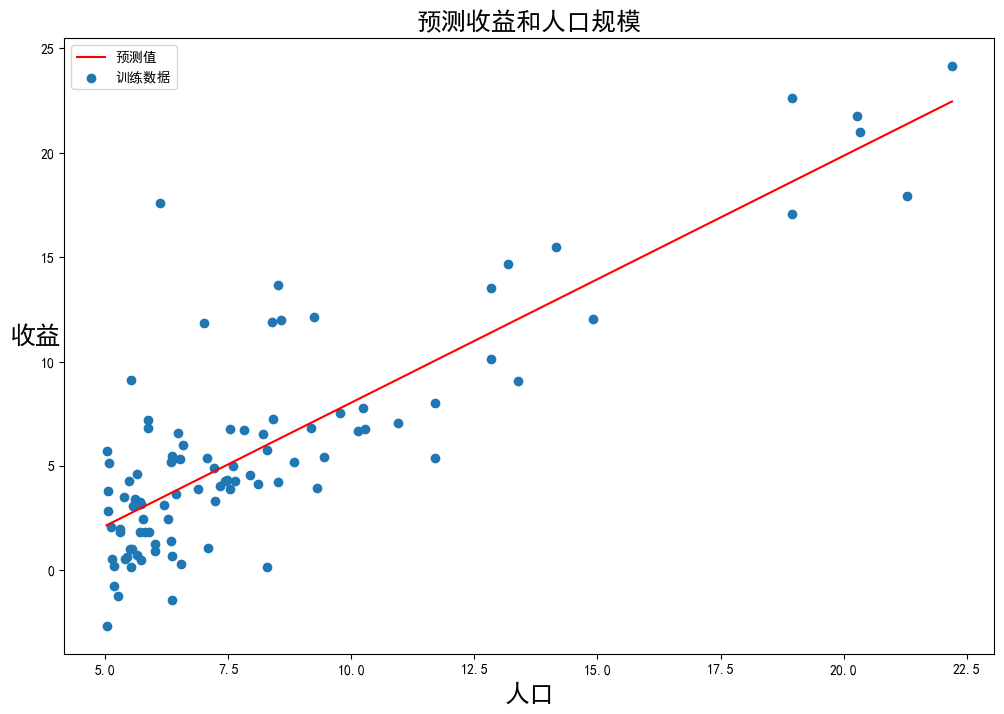

In [20]:
# 生成预测值
x = np.linspace(data['人口'].min(), data['人口'].max(), 100)
# 根据参数估计值生成预测值
f = w[0, 0] + (w[1, 0] * x)
# 创建图形和轴对象
fig, ax = plt.subplots(figsize=(12, 8))
# 绘制预测值曲线
ax.plot(x, f, 'r', label='预测值')
# 绘制训练数据散点图
ax.scatter(data['人口'], data['收益'], label='训练数据')
# 添加图例
ax.legend(loc=2)
# 设置x轴和y轴标签
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
# 设置图标题
ax.set_title('预测收益和人口规模', fontsize=18)
# 显示图形
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

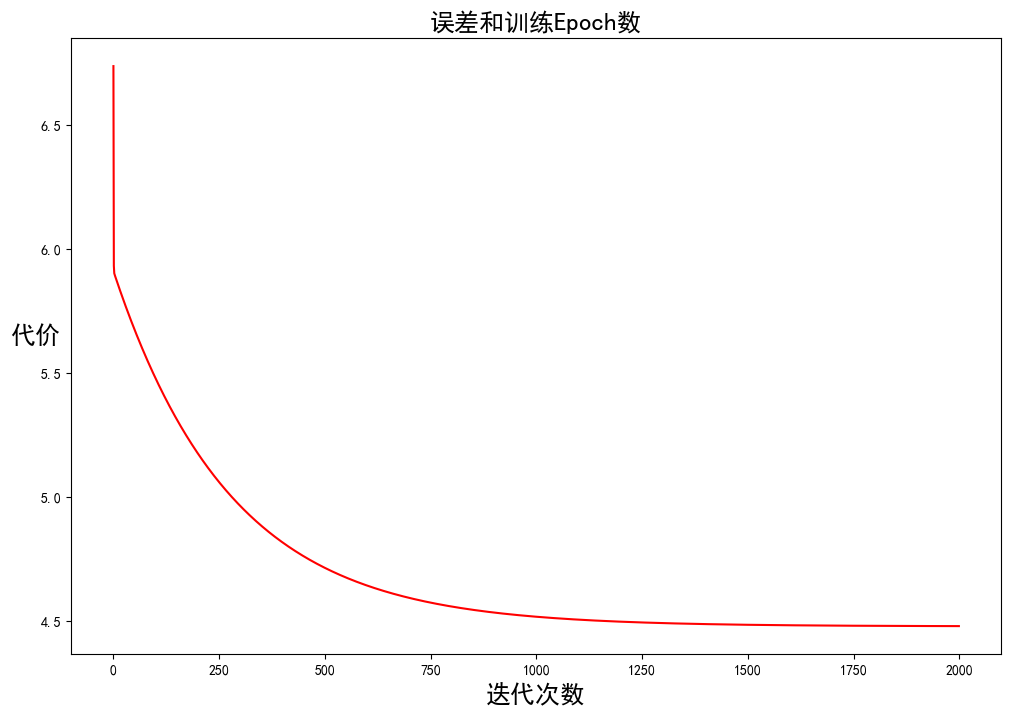

In [21]:
# 创建图形和轴对象
fig, ax = plt.subplots(figsize=(12, 8))
# 绘制代价随迭代次数的变化曲线
ax.plot(np.arange(iters), cost, 'r')
# 设置x轴和y轴标签
ax.set_xlabel('迭代次数', fontsize=18)
ax.set_ylabel('代价', rotation=0, fontsize=18)
# 设置图标题
ax.set_title('误差和训练Epoch数', fontsize=18)
# 显示图形
plt.show()

## 多变量线性回归

练习还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 我们使用我们已经应用的技术来分析数据集。

In [22]:
path = 'data/regress_data2.csv'
data2 = pd.read_csv(path)
data2.head()

,面积,房间数,价格
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


对于此任务，我们添加了另一个预处理步骤 - 特征归一化。 这个对于pandas来说很简单

In [23]:
data2 = (data2 - data2.mean()) / data2.std()#标准化数据
data2.head()

,面积,房间数,价格
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


现在我们重复第1部分的预处理步骤，并对新数据集运行线性回归程序。

In [24]:
# 添加一列全为1的列
data2.insert(0, 'Ones', 1)
# 设置X（训练数据）和y（目标变量）
cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols - 1]
y2 = data2.iloc[:, cols - 1:cols]
# 转换为数组并初始化theta
X2 = X2.values
y2 = y2.values
w2 = np.zeros((3, 1))
# 在数据集上进行线性回归
w2, cost2 = batch_gradientDescent(X2, y2, w2, alpha, iters)

在第0次迭代中，cost的值是：0.48054910410767177。
在第100次迭代中，cost的值是：0.1820944380133389。
在第200次迭代中，cost的值是：0.14793824957386828。
在第300次迭代中，cost的值是：0.1377591345050687。
在第400次迭代中，cost的值是：0.1336603777249612。
在第500次迭代中，cost的值是：0.1319404652949001。
在第600次迭代中，cost的值是：0.1312154035241262。
在第700次迭代中，cost的值是：0.13090958448719192。
在第800次迭代中，cost的值是：0.13078058791637864。
在第900次迭代中，cost的值是：0.13072617594607355。
在第1000次迭代中，cost的值是：0.13070322444853416。
在第1100次迭代中，cost的值是：0.13069354328325838。
在第1200次迭代中，cost的值是：0.13068945967339024。
在第1300次迭代中，cost的值是：0.1306877371669466。
在第1400次迭代中，cost的值是：0.13068701059694002。
在第1500次迭代中，cost的值是：0.13068670412262964。
在第1600次迭代中，cost的值是：0.13068657484877844。
在第1700次迭代中，cost的值是：0.13068652031980799。
在第1800次迭代中，cost的值是：0.13068649731895682。
在第1900次迭代中，cost的值是：0.13068648761697355。


In [25]:
# 获取模型的代价（误差）
computeCost(X2, y2, w2)

0.13068648355046528

我们也可以快速查看这一个的训练进程。

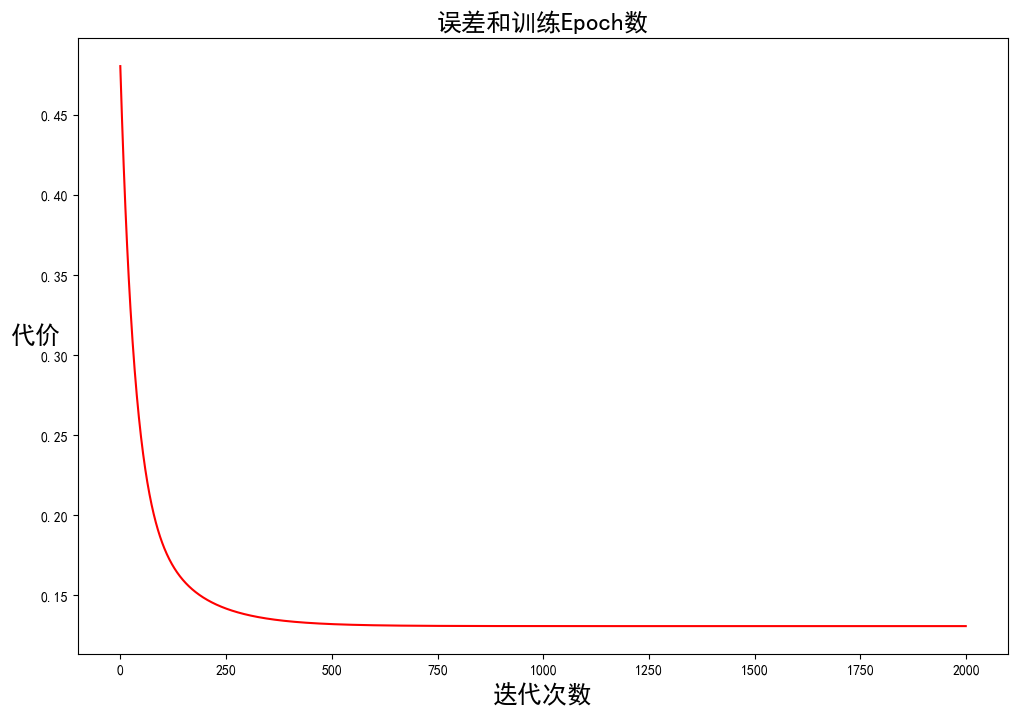

In [26]:
# 创建一个大小为 (12, 8) 的画布和坐标轴对象
fig, ax = plt.subplots(figsize=(12, 8))
# 在坐标轴上绘制代价函数 cost2 随迭代次数 iters 的变化曲线，使用红色线条
ax.plot(np.arange(iters), cost2, 'r')
# 设置 x 轴标签为 "迭代次数",字体大小为 18
ax.set_xlabel('迭代次数', fontsize=18)
# 设置 y 轴标签为 "代价",旋转角度为 0,字体大小为 18
ax.set_ylabel('代价', rotation=0, fontsize=18)
# 设置图表标题为 "误差和训练Epoch数",字体大小为 18
ax.set_title('误差和训练Epoch数', fontsize=18)
# 显示图表
plt.show()

我们也可以使用scikit-learn的线性回归函数，而不是从头开始实现这些算法。 我们将scikit-learn的线性回归算法应用于第1部分的数据，并看看它的表现。

In [27]:
# 导入线性回归模型
from sklearn.linear_model import LinearRegression

# 创建线性回归模型对象
model = LinearRegression()

# 使用训练数据 X 和标签 y 对模型进行拟合
model.fit(X, y)

C:\Users\hai_g\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


LinearRegression()

scikit-learn model的预测表现

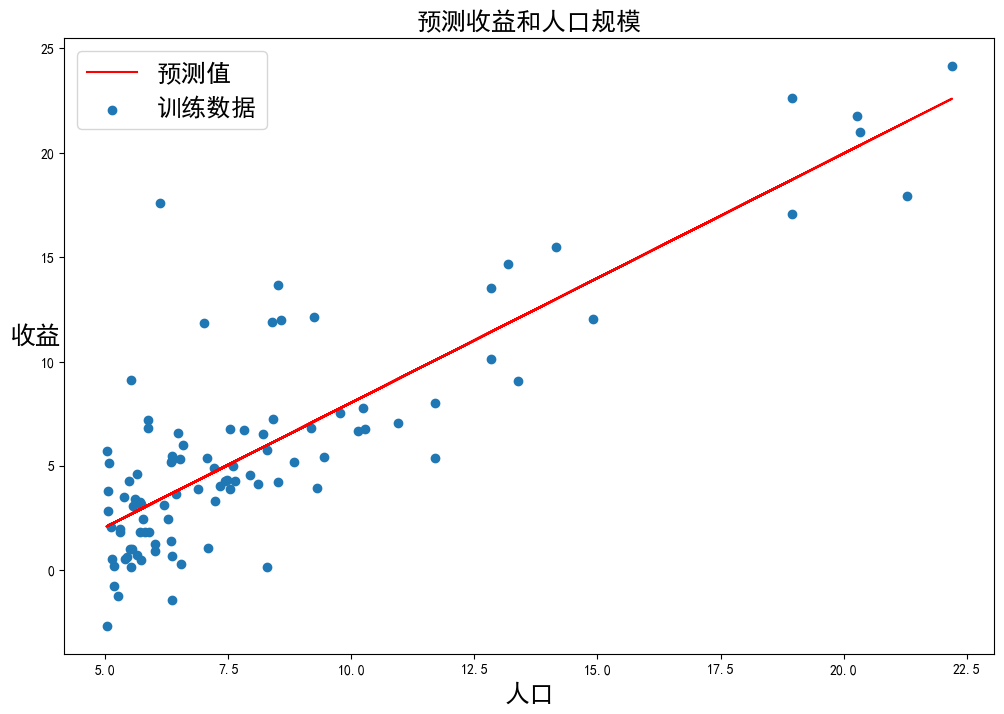

In [28]:
# 取特征矩阵 X 的第二列作为自变量 x
x = X[:, 1]
# 对模型进行预测，并将预测结果展平为一维数组 f
f = model.predict(X).flatten()
# 创建画布和坐标轴对象
fig, ax = plt.subplots(figsize=(12, 8))
# 在坐标轴上绘制预测值 f 随人口规模 x 的变化曲线，使用红色线条，并添加标签
ax.plot(x, f, 'r', label='预测值')
# 在坐标轴上绘制训练数据点的散点图，并添加标签
ax.scatter(data['人口'], data['收益'], label='训练数据')
# 显示图例，并设置位置和字体大小
ax.legend(loc=2, fontsize=18)
# 设置 x 轴标签和字体大小
ax.set_xlabel('人口', fontsize=18)
# 设置 y 轴标签、旋转角度和字体大小
ax.set_ylabel('收益', rotation=0, fontsize=18)
# 设置图表标题和字体大小
ax.set_title('预测收益和人口规模', fontsize=18)
# 显示图表
plt.show()

## $L_2$正则化
$J (  { w } ) = \frac { 1 } { 2 } \sum _ { i = 1 } ^ { m } ( h _ { w} ( x ^ { ( i ) } ) - y ^ { ( i ) } ) ^ { 2 } + \lambda \sum _ { j = 1 } ^ { n } w_ { j } ^ { 2 }$，此时称作`Ridge Regression`：

In [29]:
from sklearn.linear_model import Ridge# 导入岭回归模型
model = Ridge()
model.fit(X, y)

Ridge()

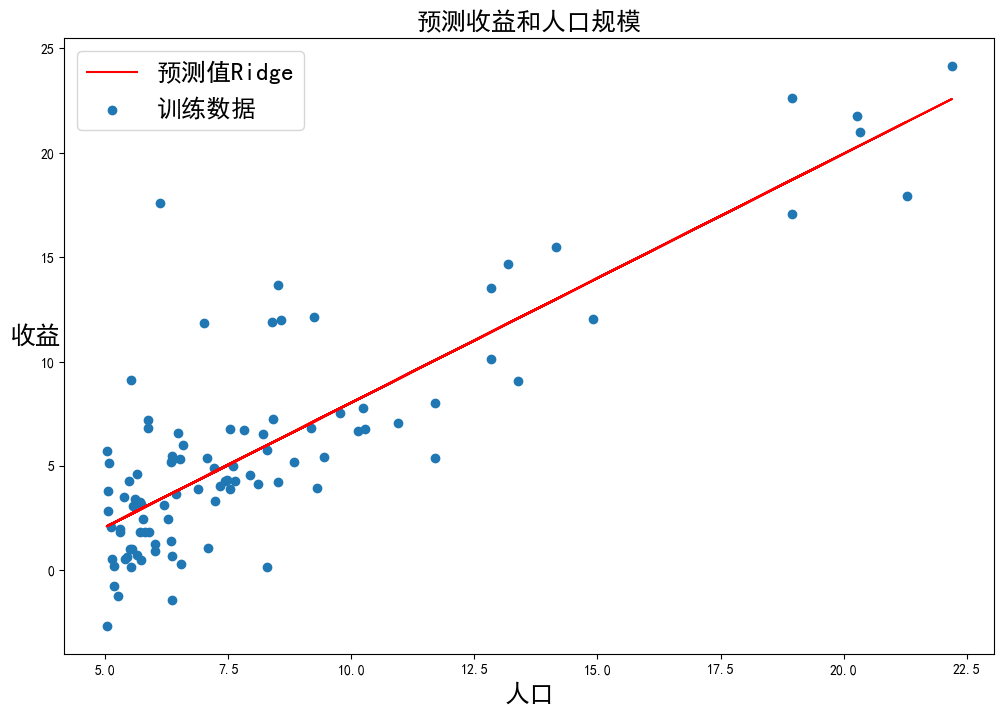

In [30]:
x2 = X[:, 1]
f2 = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x2, f2, 'r', label='预测值Ridge')
ax.scatter(data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

## $L_1$正则化：
$J (  {w } ) = \frac { 1 } { 2 } \sum _ { i = 1 } ^ { m } ( h _ { w} ( x ^ { ( i ) } ) - y ^ { ( i ) } ) ^ { 2 } + \lambda \sum _ { j = 1 } ^ { n } | w _ { j } |$，此时称作`Lasso Regression` 

In [31]:
from sklearn.linear_model import Lasso# 导入 Lasso 回归模型
model = Lasso()
model.fit(X, y)

Lasso()

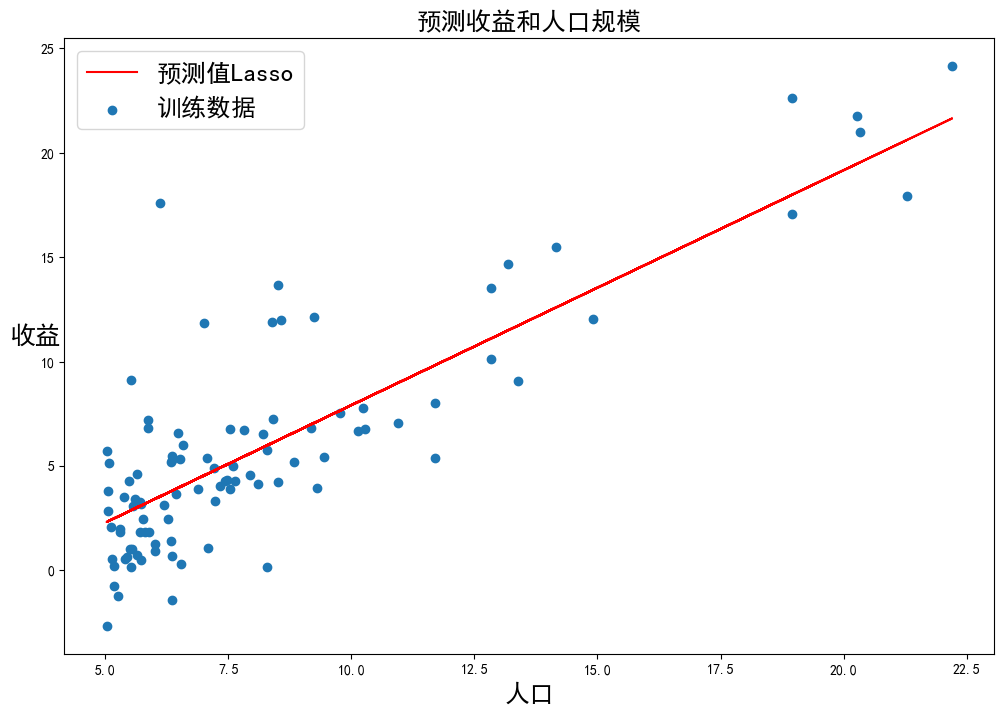

In [32]:
x3= X[:, 1]
f3 = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x3, f3, 'r', label='预测值Lasso')
ax.scatter(data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

## 调参

In [33]:
# 导入所需的库和模块
from sklearn.model_selection import cross_val_score
# 定义一组不同的alpha值
alphas = np.logspace(-3, 2, 50)
# 初始化一个空列表，用于存储测试分数
test_scores = []
# 遍历每个alpha值
for alpha in alphas:
    # 创建一个Ridge回归模型，设置alpha值
    clf = Ridge(alpha)    
    # 使用交叉验证计算负均方误差的平方根，并取平均值
    test_score = np.sqrt(-cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error'))    
    # 将平均测试分数添加到列表中
    test_scores.append(np.mean(test_score))

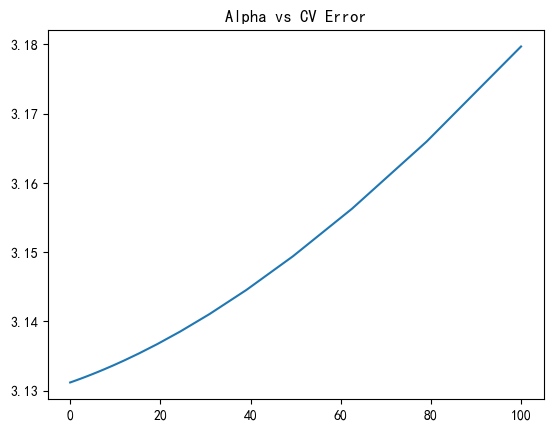

In [34]:
plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error");
plt.show()

## 最小二乘法(LSM)：

最小二乘法的需要求解最优参数$w^{*}$：

已知：目标函数

$J\left( w  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {h}\left( {x^{(i)}} \right)-{y^{(i)}} \right)}^{2}}}$

其中：${h}\left( x \right)={w^{T}}X={w_{0}}{x_{0}}+{w_{1}}{x_{1}}+{w_{2}}{x_{2}}+...+{w_{n}}{x_{n}}$

将向量表达形式转为矩阵表达形式，则有$J(w )=\frac{1}{2}{{\left( Xw -y\right)}^{2}}$ ，其中$X$为$m$行$n+1$列的矩阵（$m$为样本个数，$n$为特征个数），$w$为$n+1$行1列的矩阵(包含了$w_0$)，$y$为$m$行1列的矩阵，则可以求得最优参数$w^{*} ={{\left( {X^{T}}X \right)}^{-1}}{X^{T}}y$ 

梯度下降与最小二乘法的比较：

梯度下降：需要选择学习率$\alpha$，需要多次迭代，当特征数量$n$大时也能较好适用，适用于各种类型的模型	

最小二乘法：不需要选择学习率$\alpha$，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量$n$较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n^3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [35]:
def LSM(X, y):
    # 计算矩阵X的转置与X相乘，再求逆矩阵，最后将结果与X的转置相乘，再与向量y相乘，得到权重w
    w = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return w

In [36]:
final_w2=LSM(X, y)#感觉和批量梯度下降的theta的值有点差距
final_w2

array([[-3.89578088],
       [ 1.19303364]])

我们可以看到梯度下降得到的结果是：

array([[-3.78806857],
  
[ 1.18221277]])
       
       与最小二乘法的结果非常接近。

## 参考
[1] Andrew Ng. Machine Learning[EB/OL]. StanfordUniversity,2014.https://www.coursera.org/course/ml

[2] 李航. 统计学习方法[M]. 北京: 清华大学出版社,2019.